In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('E2_B_NoisySet')
df=df.drop(df.columns[[0]] , 1)
df

,STD_Months,0.1_TypoB,0.2_TypoB,0.3_TypoB,0.4_TypoB,0.5_TypoB,0.6_TypoB,0.7_TypoB
0,February,ebruary,Fruary,bruary,Fbury,Fbry,ebr,er
1,December,Deceber,cember,ecmber,Dcmbe,Dcer,Dmr,em
2,November,Nvember,Nvemer,Noveme,ovebr,Nobr,ove,em
3,December,Deceber,Dember,Dember,cmber,Deem,Der,me
4,November,Novembe,Noemer,oember,oembe,Noem,Nmr,oe
5,November,Novembe,oveber,ovmber,Noeme,Nvbe,Nbr,Ne
6,November,Novembr,ovemer,Novebe,oembr,Noer,vmr,oe
7,December,Decemer,Decber,ecembr,Dembr,cmbe,ceb,cr
8,November,Novembe,Novebr,ovemer,ovemb,Novm,mbe,ee
9,November,Novemer,Nomber,ovembr,vmber,ovee,obr,er


In [6]:
#Levenshtein Distance    
months = ["November", "February", "December"]
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_LD'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            ld_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                ld = jellyfish.levenshtein_distance(s1 , s2)
                print("LD :" , ld)
                if ld < ld_best:
                    ld_best = ld
                    best_match = s2
                df[col+'_LD'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("ld_best: " , ld_best)        
            print("*******")       

0.1_TypoB
row:  0
s1:  ebruary
s2:  November
LD : 8


s1:  ebruary
s2:  February
LD : 1


s1:  ebruary
s2:  December
LD : 7


Best Match:  February
ld_best:  1
*******
row:  1
s1:  Deceber
s2:  November
LD : 4


s1:  Deceber
s2:  February
LD : 6


s1:  Deceber
s2:  December
LD : 1


Best Match:  December
ld_best:  1
*******
row:  2
s1:  Nvember
s2:  November
LD : 1


s1:  Nvember
s2:  February
LD : 7


s1:  Nvember
s2:  December
LD : 3


Best Match:  November
ld_best:  1
*******
row:  3
s1:  Deceber
s2:  November
LD : 4


s1:  Deceber
s2:  February
LD : 6


s1:  Deceber
s2:  December
LD : 1


Best Match:  December
ld_best:  1
*******
row:  4
s1:  Novembe
s2:  November
LD : 1


s1:  Novembe
s2:  February
LD : 8


s1:  Novembe
s2:  December
LD : 4


Best Match:  November
ld_best:  1
*******
row:  5
s1:  Novembe
s2:  November
LD : 1


s1:  Novembe
s2:  February
LD : 8


s1:  Novembe
s2:  December
LD : 4


Best Match:  November
ld_best:  1
*******
row:  6
s1:  Novembr
s2:  November
LD : 1


In [7]:
#Levenshtein Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
LdAccuracy = []
for x in NameOfColumns:
    if "LD" in x:
        print("LD Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        LdAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(LdAccuracy)

LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  0.983333333333
LD Accuracy :  0.966666666667
LD Accuracy :  0.883333333333
LD Accuracy :  0.783333333333
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  1.0
LD Accuracy :  0.983333333333
LD Accuracy :  0.966666666667
LD Accuracy :  0.883333333333
LD Accuracy :  0.783333333333
[1.0, 1.0, 1.0, 0.98333333333333328, 0.96666666666666667, 0.8833333333333333, 0.78333333333333333, 1.0, 1.0, 1.0, 0.98333333333333328, 0.96666666666666667, 0.8833333333333333, 0.78333333333333333]


In [8]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 ]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoB_LD'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoB_LD'].iat[x]
diff

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7
0,February,,,,,,November,November
1,December,,,,,,,November
2,November,,,,,,,
3,December,,,,,,,November
4,November,,,,,,,
5,November,,,,,,,
6,November,,,,,,,
7,December,,,,,,,
8,November,,,,,,,
9,November,,,,,,,


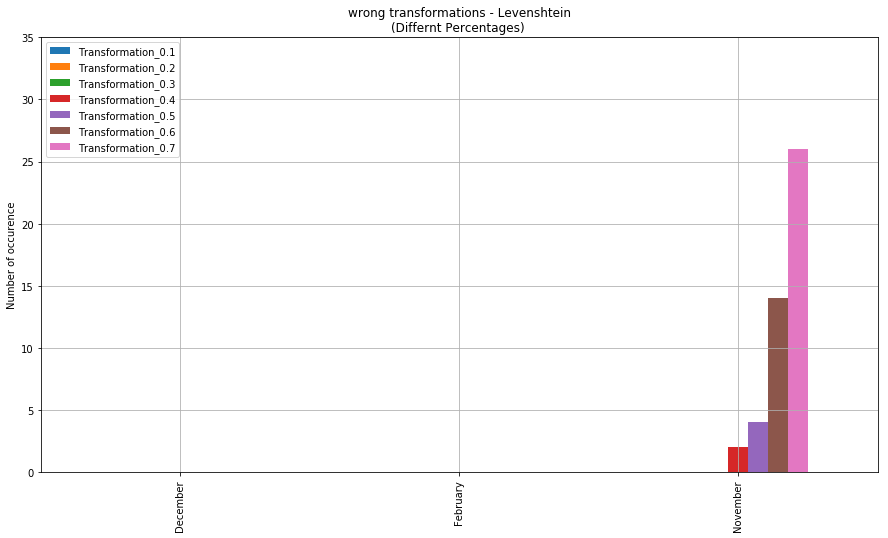

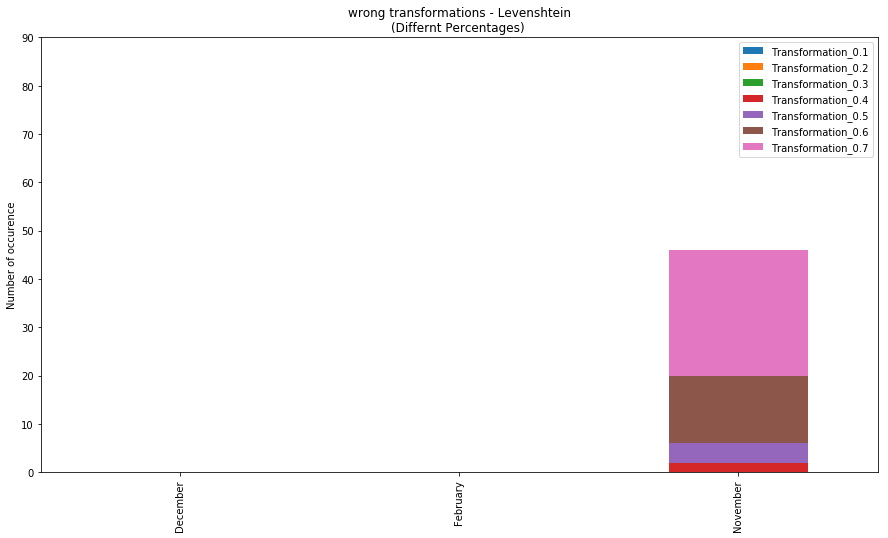

In [10]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 40 ,5))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 100 ,10))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Differnt Percentages) ')
plt.show()

In [11]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,500) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''

per = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 ]
#Iterate ove the transformed columns 
for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_LD'])
    
    if(len(c[0])>0):
        print(str(p) + '_TypoB')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoB'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.4_TypoB
December To November
Noisy form: ember


December To November
Noisy form: ember


********
0.5_TypoB
December To November
Noisy form: embe


December To November
Noisy form: emer


December To November
Noisy form: embe


December To November
Noisy form: embe


********


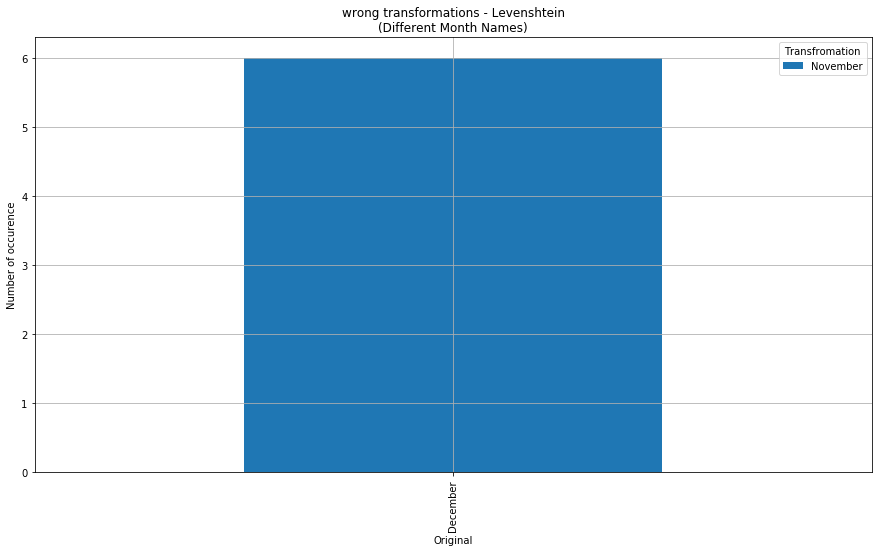

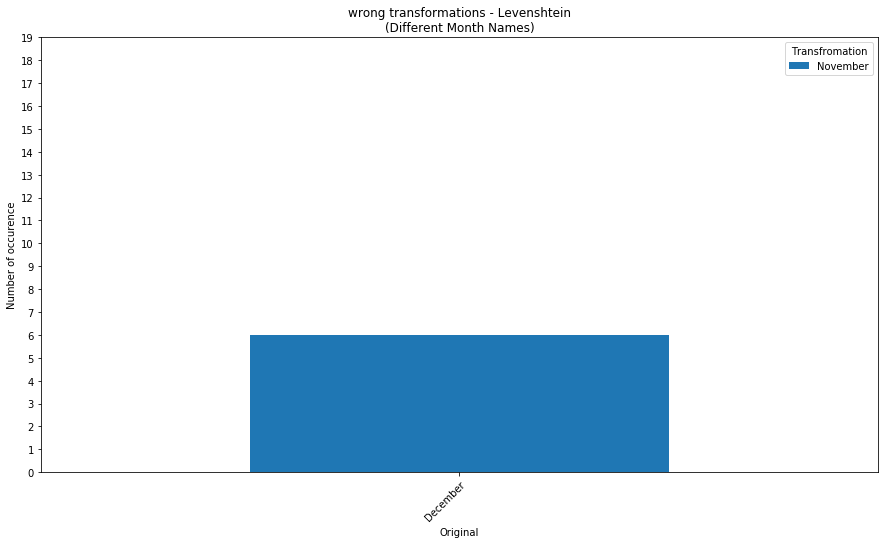

In [12]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Levenshtein\n(Different Month Names)')
plt.show()

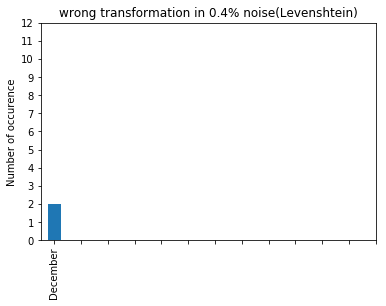

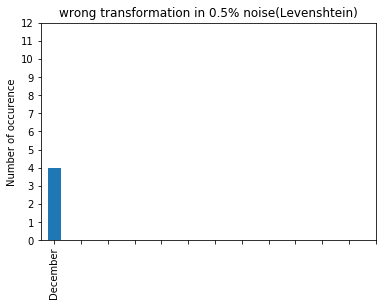

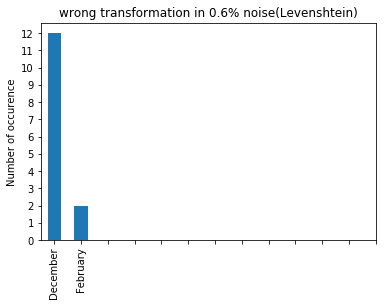

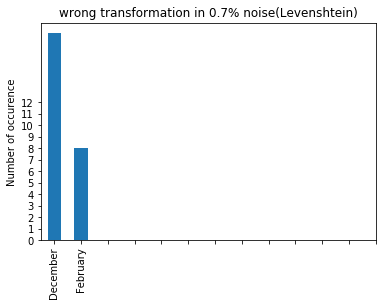

In [13]:
import numpy as np

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_LD'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoB'] = ''
    
    if(len(c[0]>0)):        
        for x in np.nditer(c):
            x = int(x)
            diff['Original'].iat[x] = df['STD_Months'].iat[x]
            diff[str(p) + '_TypoB'].iat[x] = df[str(p) + '_TypoB'].iat[x]
            diff['Transformation'].iat[x] = df[str(p) + '_TypoB_LD'].iat[x]
        diff.dropna()
        wrongTransform = diff['Original'].value_counts()
        wrongTransform.plot.bar()
        plt.yticks(range(0 , 13))
        plt.ylabel('Number of occurence')
        plt.title('wrong transformation in {}% noise(Levenshtein)'.format(p))
        plt.xticks(range(0,13))
        plt.show() 

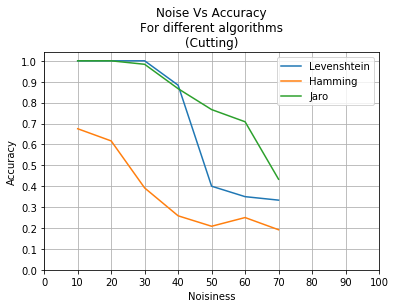

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# x = [10,20,30,40,50,60,70]
# yLD=LdAccuracy
# yHamming=[0.67500000000000004, 0.6166666666666667, 0.39166666666666666, 0.25833333333333336, 0.20833333333333334, 0.25, 0.19166666666666668]
# yJaro=[1.0, 1.0, 0.98333333333333328, 0.8666666666666667, 0.76666666666666672, 0.70833333333333337, 0.43333333333333335]
# plt.plot(x,yLD , label = 'Levenshtein')
# plt.plot(x,yHamming , label = 'Hamming')
# plt.plot(x,yJaro , label = 'Jaro')
# #Add title and label
# plt.xlabel('Noisiness')
# plt.ylabel('Accuracy')
# plt.title('Noise Vs Accuracy\nFor different algorithms\n(Cutting)')
# plt.xticks(np.arange(0 , 110 , 10))
# plt.yticks(np.arange(0 , 1.1 , 0.1))
# plt.legend()
# plt.grid()
# plt.show()